## Setup Python statistical environment

In [100]:
import pandas as pd
#import pandasql as psql
import numpy as np
#import ggplot as gg
import math
import matplotlib.pyplot as plt

In [101]:
%matplotlib inline

## Read in the input dataset

In [102]:
df = pd.read_csv("turnstile_weather_v2.csv")

## Obtain some number statistics for the input dataset

In [103]:
df.UNIT.unique().size # Obtain the number of turnstile points

240

In [104]:
df.shape # Obtain the number of dataframe records and columns

(42649, 27)

In [105]:
df.station.unique().shape # Number of NYC subway stations

(207,)

In [106]:
df.UNIT.unique().shape # Number of telemetry UNITS in the NYC subway stations

(240,)

In [107]:
stations = df.groupby('station')

In [108]:
units = df.groupby('UNIT')

In [109]:
units_in_station = stations.UNIT.unique() # Find the UNITs in each section

In [110]:
units_in_station

station
1 AVE                          [R248]
103 ST-CORONA                  [R208]
104 ST                         [R007]
110 ST                         [R181]
110 ST-CPN                     [R323]
111 ST                   [R008, R310]
121 ST                         [R009]
125 ST                   [R034, R102]
135 ST                         [R207]
138 ST-GR CONC                 [R307]
14 ST                          [R105]
145 ST             [R101, R273, R344]
148 ST-LENOX                   [R345]
149 ST-3 AVE                   [R053]
149 ST-GR CONC                 [R205]
167 ST                   [R104, R221]
168 ST-BROADWAY                [R035]
169 ST                         [R115]
170 ST                         [R243]
174-175 ST                     [R253]
175 ST                         [R126]
176 ST                         [R309]
18 AVE                   [R242, R372]
18 ST                          [R321]
181 ST                         [R260]
182-183 ST                     [R237]
183 

In [111]:
multiunit_stations = units_in_station.map(len)[units_in_station.map(len) > 1]

In [112]:
multiunit_stations.shape

(28,)

In [113]:
multiunit_stations # Which are the subway stations containing more than 1 UNIT?

station
111 ST             2
125 ST             2
145 ST             3
167 ST             2
18 AVE             2
23 ST-6 AVE        2
25 ST              2
34 ST-HERALD SQ    2
34 ST-PENN STA     3
42 ST-TIMES SQ     2
50 ST              3
86 ST              3
ATLANTIC AVE       2
BOWLING GREEN      2
CHAMBERS ST        2
CHURCH AVE         2
DEKALB AVE         2
FORDHAM ROAD       2
GRAND ST           2
HOYT ST            2
JAY ST-METROTEC    2
LEXINGTON AVE      3
LEXINGTON-53 ST    2
NOSTRAND AVE       2
PROSPECT AVE       2
RECTOR ST          2
SPRING ST          2
WALL ST            2
Name: UNIT, dtype: int64

In [114]:
(units.DATEn.unique().apply(len)==31).all() # Does every UNIT has data for all 31 days?

False

In [115]:
units.DATEn.unique()[units.DATEn.unique().apply(len)!=31] # Whicha are the UNITs with less than 31-days worth of data?

UNIT
R228    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R253    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R260    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R273    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R295    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R356    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R453    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R459    [05-14-11, 05-15-11, 05-16-11, 05-17-11, 05-18...
Name: DATEn, dtype: object

In [116]:
(units.TIMEn.unique().apply(len)==6).all() # Does every UNIT has data for all 6 timepoints?

True

In [117]:
df.apply(pd.isnull,axis=0).any() # Checking input dataset for missing/NaN values

UNIT               False
DATEn              False
TIMEn              False
ENTRIESn           False
EXITSn             False
ENTRIESn_hourly    False
EXITSn_hourly      False
datetime           False
hour               False
day_week           False
weekday            False
station            False
latitude           False
longitude          False
conds              False
fog                False
precipi            False
pressurei          False
rain               False
tempi              False
wspdi              False
meanprecipi        False
meanpressurei      False
meantempi          False
meanwspdi          False
weather_lat        False
weather_lon        False
dtype: bool

In [118]:
df.describe().T # Printing the data ranges for each column

,count,mean,std,min,25%,50%,75%,max
ENTRIESn,42649,28124856.263242,30436070.292291,0.000000,10397624.000000,18183888.000000,32630491.000000,2.357746e+08
EXITSn,42649,19869932.521607,20289857.656428,0.000000,7613712.000000,13316091.000000,23937714.000000,1.493782e+08
ENTRIESn_hourly,42649,1886.589955,2952.385585,0.000000,274.000000,905.000000,2255.000000,3.281400e+04
EXITSn_hourly,42649,1361.487866,2183.845409,0.000000,237.000000,664.000000,1537.000000,3.482800e+04
hour,42649,10.046754,6.938928,0.000000,4.000000,12.000000,16.000000,2.000000e+01
day_week,42649,2.905719,2.079231,0.000000,1.000000,3.000000,5.000000,6.000000e+00
weekday,42649,0.714436,0.451688,0.000000,0.000000,1.000000,1.000000,1.000000e+00
latitude,42649,40.724647,0.071650,40.576152,40.677107,40.717241,40.759123,4.088918e+01
longitude,42649,-73.940364,0.059713,-74.073622,-73.987342,-73.953459,-73.907733,-7.375538e+01
fog,42649,0.009824,0.098631,0.000000,0.000000,0.000000,0.000000,1.000000e+00


## Plotting the UNITs/stations on a map

### Determining whether it's the UNITs or the stations that have unique coordinates

In [119]:
(units.latitude.unique().apply(len) > 1).any()  # Are there any UNITs having multiple geographical coordinates?

False

In [120]:
(stations.latitude.unique().apply(len) > 1).any() # Are there any stations having multiple geographical coordinates?

True

Obviously, it is the UNITs that have unique coordinates (latitude/longitude tuple).

### Determining the relationship between UNITs and Met Stations

In [174]:
# Are there any units associated with more than one meteorological station?
((units.weather_lat.unique().apply(len) > 1) | (units.weather_lon.unique().apply(len) > 1)).any()

False

We also see, that each UNIT is serviced by only one meteorological station during the whole data collection period.

### Plotting the UNITs on a map

We create a new DataFrame that will contain the coordinates of the UNITs

In [185]:
unit_coords = pd.DataFrame({'latitude':units.latitude.unique(), 'longitude':units.longitude.unique(), 
                           'weather_lat':units.weather_lat.unique(), 'weather_lon':units.weather_lon.unique()})

In [186]:
unit_coords.head()

,latitude,longitude,weather_lat,weather_lon
UNIT,,,,
R003,[40.689945],[-73.872564],[40.700348],[-73.887177]
R004,[40.69132],[-73.867135],[40.679413],[-73.851105]
R005,[40.692304],[-73.860151],[40.679413],[-73.851105]
R006,[40.693866],[-73.851568],[40.679413],[-73.851105]
R007,[40.695184],[-73.844326],[40.679413],[-73.851105]


Here is a function that transforms the geographical coordinated into Spherical Mercator map coordinates. Spherical Mercator is the projection used by Google Maps, from which we will take a snapshot of NYC's map.

In [123]:
def WGS84toGoogleBing(lat, lon):
  x = lon * 20037508.34 / 180.0;
  y = math.log(math.tan((90.0 + lat) * math.pi / 360.0)) / (math.pi / 180.0);
  y = y * 20037508.34 / 180.0;
  return (x, y)

We add a new column with the Mercator-transformed points to the UNIT's coordinate DataFrame

In [187]:
unit_coords = unit_coords.assign(mercator_coords=unit_coords.apply(lambda row: WGS84toGoogleBing(row[0][0],row[1][0]), axis=1))

Here we read the base map screenshot, as obtained from http://www.maptiler.org/photoshop-google-maps-overlay-tiles/

In [188]:
google_nyc_map = plt.imread("./staticmap.png")
google_nyc_map.shape

(1280, 1280, 3)

We define a function that maps the Mercator-projected points onto the Google Map screenshot

In [189]:
def proj2pic(x, y):
    # The screenshot map coordinates are obtained from Maptiler.org
    map_coords = {'xmin':-8251109.673785778, 'ymin':4947908.707295347, 
                  'xmax':-8202189.975683266, 'ymax': 4996828.40539786}
    xsize, ysize = google_nyc_map.shape[0], google_nyc_map.shape[1]
    xscale = map_coords['xmax'] - map_coords['xmin']
    yscale = map_coords['ymax'] - map_coords['ymin']
    
    picx = xsize * (x - map_coords['xmin']) / xscale
    picy = ysize - (ysize * (y - map_coords['ymin']) / yscale)
    
    return (picx, picy)

We add two new columns to the coordinates DataFrame, containing the final picture coords.

In [191]:
unit_coords = unit_coords.assign(pic_coords = unit_coords.apply(lambda row: proj2pic(row[4][0],row[4][1]), axis=1))

In [192]:
unit_coords.head()

,latitude,longitude,weather_lat,weather_lon,mercator_coords,pic_coords
UNIT,,,,,,
R003,[40.689945],[-73.872564],[40.700348],[-73.887177],"(-8223456.20693, 4966715.630427459)","(723.562060885, 787.9106670147889)"
R004,[40.69132],[-73.867135],[40.679413],[-73.851105],"(-8222851.85341, 4966917.498055205)","(739.375169505, 782.6287341015325)"
R005,[40.692304],[-73.860151],[40.679413],[-73.851105],"(-8222074.39809, 4967061.964427493)","(759.717543902, 778.8487239276977)"
R006,[40.693866],[-73.851568],[40.679413],[-73.851105],"(-8221118.9429, 4967291.2944933735)","(784.717343366, 772.8482272829224)"
R007,[40.695184],[-73.844326],[40.679413],[-73.851105],"(-8220312.76715, 4967484.805094864)","(805.811197229, 767.7849587118635)"


[0, 1280, 1280, 0]

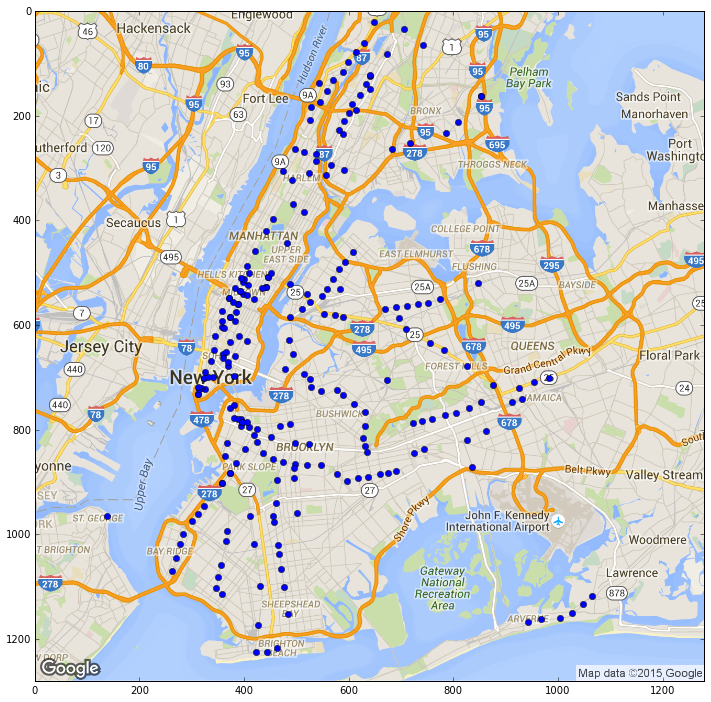

In [193]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.imshow(google_nyc_map)
xx, yy = zip(*unit_coords.pic_coords.values)
plt.plot(xx, yy, "bo")
plt.axis([0,google_nyc_map.shape[0],google_nyc_map.shape[1],0])

# Meteorological Conditions

In [130]:
dates_group = df.groupby("datetime")

In [131]:
dates_group.rain.unique().map(len)[dates_group.rain.unique().map(len) > 1]

datetime
2011-05-04 00:00:00    2
2011-05-04 04:00:00    2
2011-05-04 16:00:00    2
2011-05-04 20:00:00    2
2011-05-14 00:00:00    2
2011-05-14 04:00:00    2
2011-05-14 08:00:00    2
2011-05-14 12:00:00    2
2011-05-14 16:00:00    2
2011-05-14 20:00:00    2
2011-05-15 16:00:00    2
2011-05-15 20:00:00    2
2011-05-16 00:00:00    2
2011-05-16 04:00:00    2
2011-05-16 08:00:00    2
2011-05-16 12:00:00    2
2011-05-16 16:00:00    2
2011-05-16 20:00:00    2
2011-05-18 00:00:00    2
2011-05-18 04:00:00    2
2011-05-18 12:00:00    2
2011-05-19 00:00:00    2
2011-05-19 04:00:00    2
2011-05-19 08:00:00    2
2011-05-19 12:00:00    2
2011-05-19 16:00:00    2
2011-05-19 20:00:00    2
2011-05-20 00:00:00    2
2011-05-20 04:00:00    2
2011-05-20 08:00:00    2
2011-05-20 20:00:00    2
2011-05-23 00:00:00    2
2011-05-23 04:00:00    2
2011-05-23 08:00:00    2
2011-05-23 12:00:00    2
2011-05-23 16:00:00    2
2011-05-23 20:00:00    2
2011-05-30 00:00:00    2
2011-05-30 04:00:00    2
2011-05-30 08:00

In [132]:
dates_group.fog.unique().map(len)[dates_group.fog.unique().map(len) > 1]

datetime
2011-05-15 08:00:00    2
2011-05-15 12:00:00    2
2011-05-18 16:00:00    2
2011-05-19 20:00:00    2
2011-05-24 04:00:00    2
2011-05-24 08:00:00    2
Name: fog, dtype: int64

In [200]:
metstat = df[['weather_lat','weather_lon']].drop_duplicates()

In [201]:
metstat.shape # Find the number of meteorological stations

(37, 2)

In [202]:
metstat = metstat.assign(mercator_coords = metstat.apply(lambda row: WGS84toGoogleBing(row[0],row[1]), axis=1))
metstat = metstat.assign(pic_coords = metstat.apply(lambda row: proj2pic(row[2][0],row[2][1]), axis=1))
metstat = metstat.set_index(np.arange(0, metstat.shape[0])) # Renumber the index for this DataFrame as 0:N-1
metstat = metstat.assign(color = metstat.index/metstat.shape[0])

In [203]:
metstat.head()

,weather_lat,weather_lon,mercator_coords,pic_coords,color
0,40.700348,-73.887177,"(-8225082.91865, 4968243.02767558)","(680.998613424, 747.9458153614136)",0.000000
1,40.679413,-73.851105,"(-8221067.40198, 4965169.535928402)","(786.06592861, 828.3647383920505)",0.027027
2,40.718239,-73.839005,"(-8219720.43614, 4970870.39180045)","(821.309733049, 679.1999683861084)",0.054054
3,40.752632,-73.979225,"(-8235329.65513, 4975923.124158808)","(412.889381106, 546.9935634090141)",0.081081
4,40.742073,-73.998711,"(-8237498.82673, 4974371.606156858)","(356.132292403, 587.5895425243147)",0.108108


In [170]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor_points = np.array([np.array(i) for i in metstat['pic_coords'].values])
vor = Voronoi(vor_points)

In [138]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [159]:
(units.weather_lat.unique().map(len) == 1).all()

True

In [214]:
unit_coords.describe

<bound method DataFrame.describe of          latitude     longitude  weather_lat   weather_lon  \
UNIT                                                         
R003  [40.689945]  [-73.872564]  [40.700348]  [-73.887177]   
R004   [40.69132]  [-73.867135]  [40.679413]  [-73.851105]   
R005  [40.692304]  [-73.860151]  [40.679413]  [-73.851105]   
R006  [40.693866]  [-73.851568]  [40.679413]  [-73.851105]   
R007  [40.695184]  [-73.844326]  [40.679413]  [-73.851105]   
R008  [40.697405]  [-73.836354]  [40.718239]  [-73.839005]   
R009  [40.700536]  [-73.828382]  [40.718239]  [-73.839005]   
R011  [40.757303]  [-73.989787]  [40.752632]  [-73.979225]   
R012  [40.752247]  [-73.993456]  [40.742073]  [-73.998711]   
R013  [40.752247]  [-73.993456]  [40.742073]  [-73.998711]   
R016   [40.75753]  [-73.969102]  [40.755226]  [-73.966812]   
R017   [40.75753]  [-73.969102]  [40.755226]  [-73.966812]   
R018  [40.746655]  [-73.891361]   [40.72057]  [-73.888191]   
R019  [40.712622]  [-73.783815]  [

In [211]:
pd.merge(unit_coords, metstat, on = ['weather_lat','weather_lon'], how="left")

TypeError: type object argument after * must be a sequence, not map

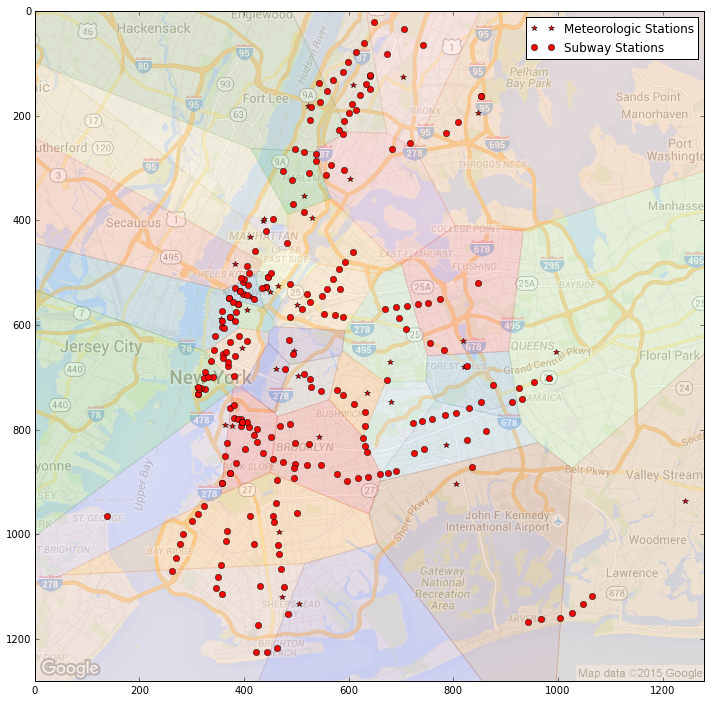

In [151]:
import matplotlib.cm as cm

regions, vertices = voronoi_finite_polygons_2d(vor)


# Draw and colorize Voronoi tesselation
col = 0
clrmap = cm.get_cmap("Paired", lut = metstat.shape[0])
for region in regions:
    col = col + 1
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.2, color=clrmap(metstat.color[col-1]))

plt.plot(vor_points[:,0], vor_points[:,1], 'r*', label="Meteorologic Stations")
plt.gca().invert_yaxis()

plt.imshow(google_nyc_map, alpha=0.4)

plt.plot(xx, yy, "ro", mec="k",label = "Subway Stations")

plt.axis([0, google_nyc_map.shape[0], google_nyc_map.shape[1], 0])

plt.legend()